<div>
  <center><h2><strong>Controle e Automação</strong></h2></center>
  <center><h3><strong>ESTUDO DIRIGIDO</strong></h3></center>
</div><p>



<div>
<center><strong>Semestre:</strong> 2025.1<p></center>
<center><strong>Livro Texto:</strong> Sistemas de Controle Moderno (Dorf & Bishop, 8ª Edição)<p></center>
<strong>Professor:</strong> Moacy Pereira da Silva<p>
<strong>Aluno:</strong> Ivysson Fernandes de Queiroz Uchôa<p>


# Capítulo 10 - O Projeto de Sistemas de Controle com Realimentação

<p>O desempenho de um sistema de controle com realimentação é essencial e abrange aspectos como estabilidade, resposta adequada a entradas, baixa sensibilidade a variações de parâmetros, erro de regime permanente reduzido e boa rejeição a distúrbios.
<p>Na prática, é raro que um sistema atenda plenamente a todas essas exigências sem algum tipo de ajuste. Muitas vezes, é necessário equilibrar requisitos conflitantes, e a simples modificação de parâmetros pode não ser suficiente. Nesses casos, pode ser preciso redesenhar a estrutura do sistema para atingir o desempenho desejado.
<p>Esse processo de modificar ou ajustar um sistema de controle com o objetivo de melhorar sua performance é denominado compensação. Ao reprojetar a estrutura do sistema para alterar sua resposta, introduz-se um elemento adicional no laço de controle. Esse componente complementar atua para corrigir deficiências no desempenho. O dispositivo de compensação, ou compensador, pode assumir diversas formas, como elétrica, mecânica, hidráulica, pneumática, entre outras.

## 10.1 Abordagem ao projeto de sistemas

<p>O desempenho de um sistema de controle pode ser avaliado por meio de características no domínio do tempo ou de critérios no domínio da frequência.
<p>No domínio do tempo, esse desempenho é especificado por parâmetros como o tempo de pico (𝑇𝑝), o valor máximo de ultrapassagem e o tempo de acomodação, geralmente em resposta a uma entrada em degrau. Também é comum definir o erro estacionário máximo admissível para diferentes tipos de entradas de teste. Essas exigências podem ser traduzidas em uma localização desejada dos polos e zeros da função de transferência em malha fechada
𝑇(𝑠)no plano 𝑠.

 <p>O método do lugar das raízes é utilizado para analisar a estabilidade e projetar os parâmetros do sistema. Caso o traçado do lugar das raízes não atenda aos requisitos de desempenho, pode-se introduzir uma estrutura de compensação para modificar esse traçado e posicionar os polos de malha fechada conforme desejado.

 <p>Por outro lado, no domínio da frequência, o desempenho é descrito por parâmetros como o pico da resposta em frequência de malha fechada (𝑀), a frequência de ressonância (𝜔𝑟), a largura de banda e a margem de fase do sistema. Para atender a essas especificações, uma estrutura de compensação apropriada pode ser projetada. O desenvolvimento dessa estrutura, representada por 𝐺(𝑠), baseia-se na resposta em frequência do sistema, que pode ser analisada por meio de representações como o diagrama polar, os diagramas de Bode ou as cartas de Nichols.

 <p>Entre essas representações, os diagramas de Bode são mais preferidos, pois permitem incorporar facilmente a função de transferência do compensador através da soma das respostas em frequência, simplificando o processo de projeto.

## 10.2 Estruturas de compensação em cascata

<p>Estruturas de Compensação em Cascata consistem em componentes ou circuitos adicionais introduzidos em sistemas de controle com realimentação, com o objetivo de corrigir deficiências no desempenho.

<p>Esses compensadores são normalmente inseridos no caminho direto do sinal de controle, antes do processo a ser controlado, razão pela qual também são conhecidos como compensadores em série. Sua função de transferência é representada por 𝐺(𝑠).

<p>O principal propósito de um compensador em cascata é modificar o comportamento dinâmico do sistema, seja alterando o traçado do lugar das raízes ou seja ajustando a resposta em frequência, a fim de atender às especificações de desempenho desejadas.

<p>Função de transferência de um compensador:

$$
G_c(s) = \frac{K \prod_{j=1}^{M}(s + z_j)}{\prod_{j=1}^{M}(s + p_j)}
$$


<p>O problema de projeto, então, se resume à escolha adequada dos polos (pj​) e zeros (zj​) do compensador. Uma abordagem comum é utilizar um compensador de primeira ordem, que pode ser estendido para ordens mais elevadas encadeando múltiplos compensadores de primeira ordem.

<p>Um compensador de primeira ordem possui a função de transferência:

$$
G_c(s) = \frac{K(s + z)}{(s + p)}
$$


## 10.3 Projeto de Compensador de Avanço de Fase Utilizando o Diagrama de Bode

<p>O diagrama de Bode é amplamente utilizado no projeto de compensadores de avanço de fase. Nesse processo, a resposta em frequência do compensador em cascata é somada à do sistema não compensado. O objetivo é ajustar os polos e zeros do compensador de forma a modificar a resposta em frequência do sistema de maneira satisfatória.

<p>Exemplo de Projeto de Compensador de Avanço de Fase
<li>Função de transferência:</li>

$$
G(s) = \frac{10}{s(s + 1)}
$$


In [1]:
! pip install control


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Ivysson\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


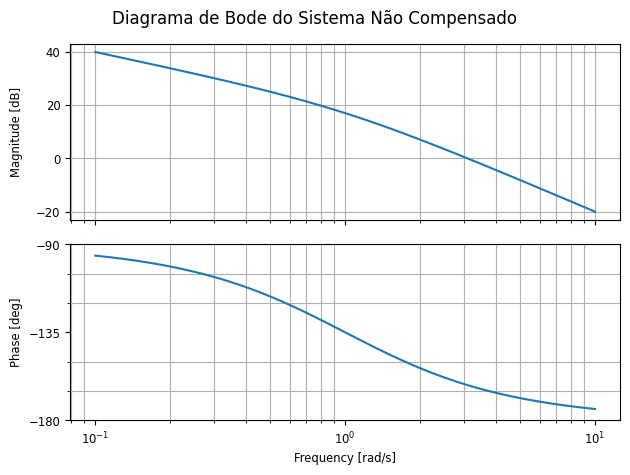

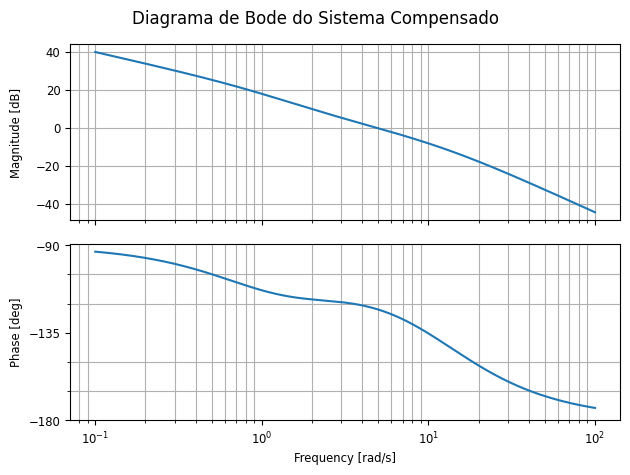

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência do sistema não compensado
G = ctrl.TransferFunction([10], [1, 1, 0])

# Plotar o diagrama de Bode do sistema não compensado
plt.figure()
ctrl.bode(G, dB=True)
plt.suptitle('Diagrama de Bode do Sistema Não Compensado')
plt.grid()
plt.show()

# Parâmetros do compensador
omega_z = 2.0
omega_p = 12.0
K = 6

# Função de transferência do compensador
Gc = ctrl.TransferFunction([K, K*omega_z], [1, omega_p])

# Sistema compensado
G_compensated = Gc * G

# Plotar o diagrama de Bode do sistema compensado
plt.figure()
ctrl.bode(G_compensated, dB=True)
plt.suptitle('Diagrama de Bode do Sistema Compensado')
plt.grid()
plt.show()


## 10.4 Projeto de avanço de fase usando o Lugar das raízes

<p>O projeto de uma estrutura de compensação por avanço de fase também pode ser conduzido por meio do método do lugar das raíze.

$$
G_C(s) = \frac{s + \left(\frac{1}{\alpha \tau}\right)}{s + \left(\frac{1}{\tau}\right)} = \frac{s + z}{s + p}
$$


<p>O método do lugar das raízes no plano 𝑠 segue os seguintes passos:

<li>1. Listar as especificações de desempenho do sistema e traduzi-las na localização desejada de um conjunto de polos dominantes.</li>
<li>2. Traçar o lugar das raízes do sistema não compensado e verificar se a posição desejada dos polos pode ser alcançada sem a utilização de compensação.</li>
<li>3. Caso seja necessário introduzir um compensador, posicionar o zero do compensador por avanço de fase exatamente abaixo (ou próximo) da posição desejada das raízes.</li>
<li>4. Determinar a posição do polo do compensador de forma que a contribuição angular total na localização desejada seja de 180°, garantindo que esse ponto pertença ao lugar das raízes do sistema compensado.</li>
<li>5. Calcular o ganho do sistema para essa localização desejada e, em seguida, obter a constante de erro estático correspondente.</li>
<li>6. Se a constante de erro não atender às especificações, repetir o processo ajustando os parâmetros do compensador.</li>

<p>A principal vantagem do método do lugar das raízes é permitir ao projetista especificar diretamente a localização dos polos dominantes e, com isso, controlar a resposta transitória do sistema. Por outro lado, sua limitação está na dificuldade de representar com precisão as constantes de erro estático.



## 10.5 Projeto de Compensador de Atraso de Fase Utilizando o Lugar das Raízes

<p>O método do lugar das raízes é uma ferramenta eficaz no projeto de compensadores de atraso de fase, permitindo o posicionamento estratégico dos polos e zeros do compensador para aprimorar a resposta do sistema. A forma geral de um compensador de atraso de fase pode ser representada por:

$$
G_c(s) = K \frac{1 + \alpha T s}{1 + T s}
$$

<p> onde 𝛼 > 1.

<p>Este compensador aumenta a margem de ganho e melhora a precisão do sistema em regime permanente.

<p>Exemplo de Projeto de Compensador de Atraso de Fase

<p>Considere um sistema de segunda ordem com a função de transferência em malha aberta:

$$
L(s) = \frac{10}{s(s + 1)}
$$


/usr/local/lib/python3.11/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


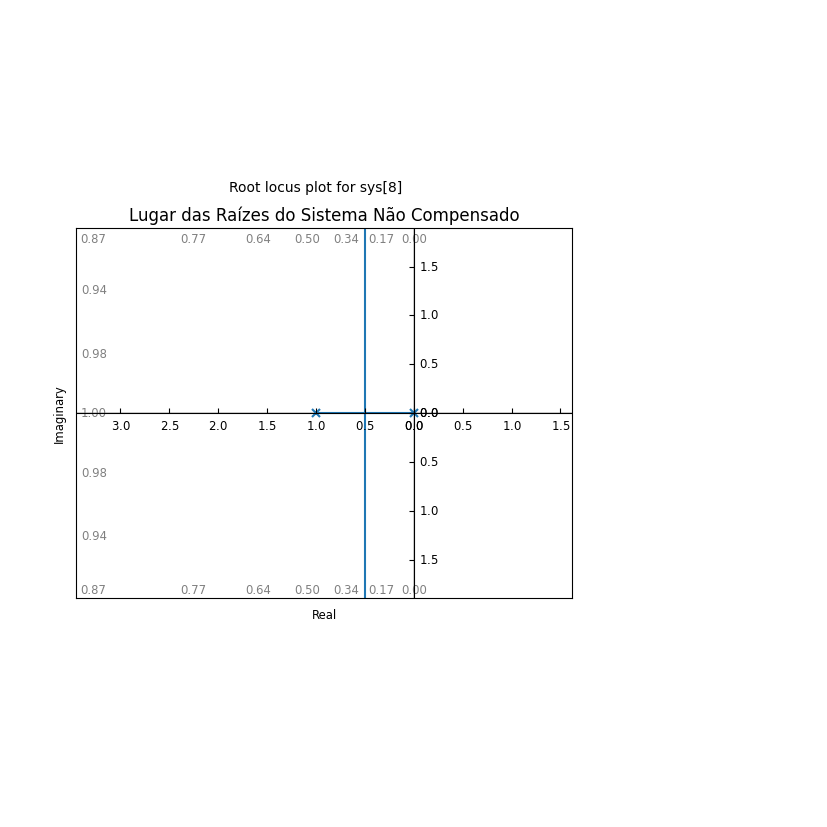

/usr/local/lib/python3.11/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


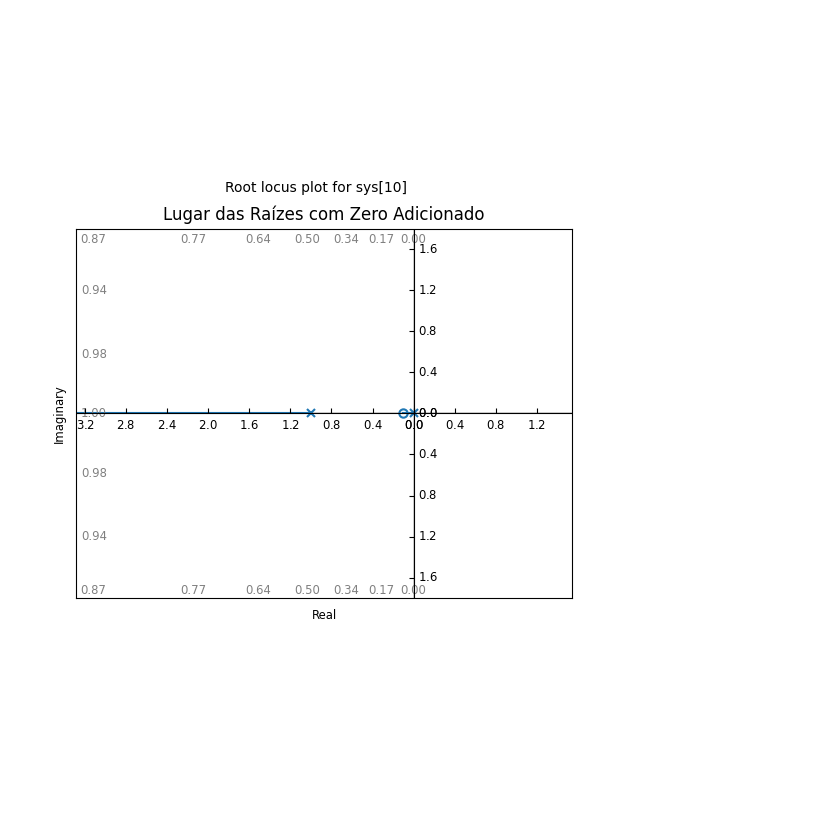

/usr/local/lib/python3.11/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


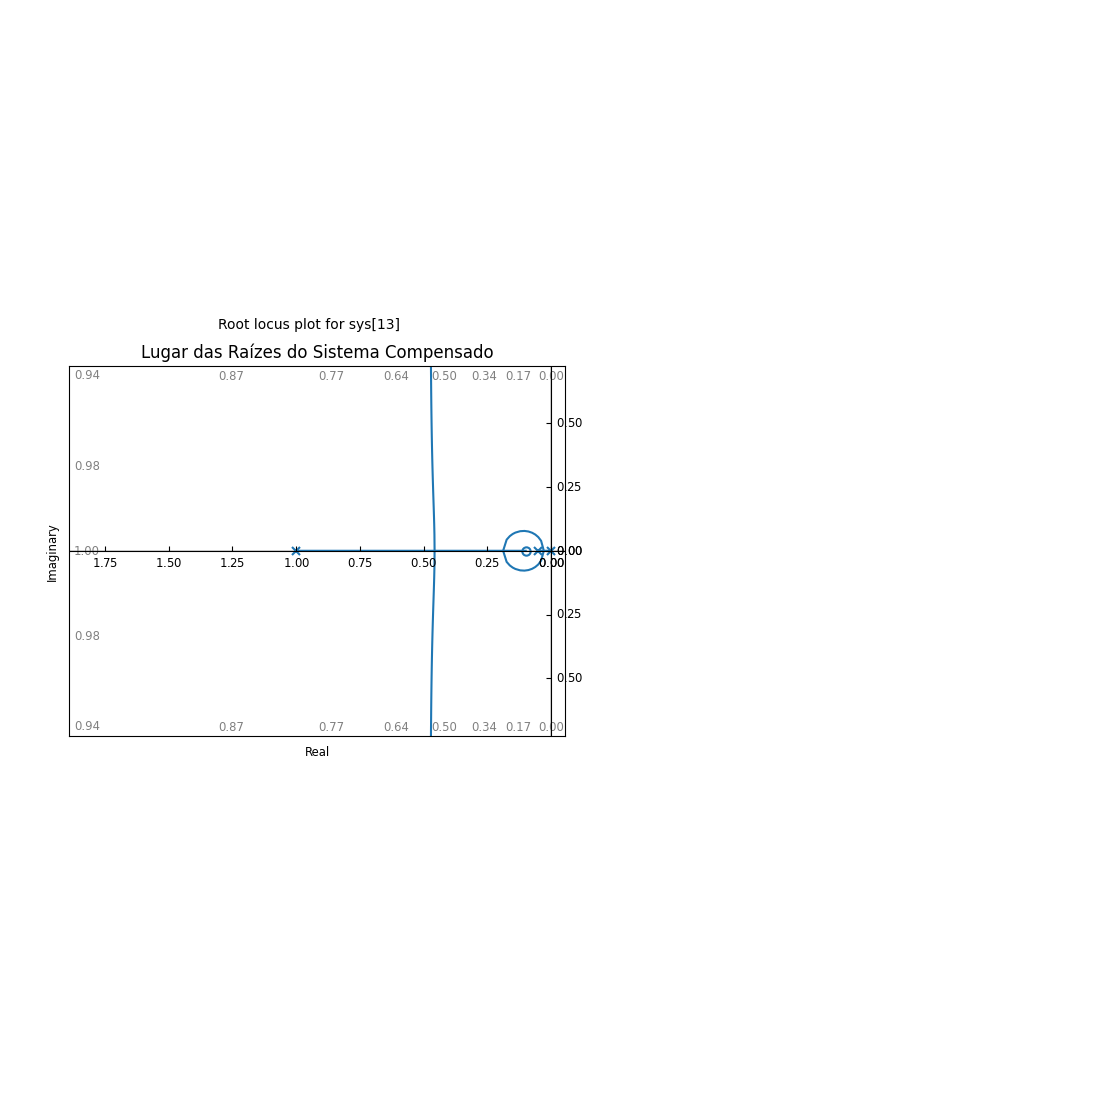

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Função de transferência do sistema não compensado
G = ctrl.TransferFunction([10], [1, 1, 0])

# Plotar o lugar das raízes do sistema não compensado
plt.figure()
ctrl.root_locus(G, plot=True)
plt.title('Lugar das Raízes do Sistema Não Compensado')
plt.grid()
plt.show()

# Compensador de atraso de fase
zero = -0.1
G_c_zero = ctrl.TransferFunction([1, -zero], [1])

# Sistema compensado com o zero adicionado
G_zero_added = G_c_zero * G

# Plotar o lugar das raízes do sistema com zero adicionado
plt.figure()
ctrl.root_locus(G_zero_added, plot=True)
plt.title('Lugar das Raízes com Zero Adicionado')
plt.grid()
plt.show()

# Polo do compensador
pole = -0.05
G_c_pole = ctrl.TransferFunction([1], [1, -pole])

# Compensador completo
G_c = G_c_zero * G_c_pole

# Sistema compensado com zero e polo do compensador
G_compensated = G_c * G

# Plotar o lugar das raízes do sistema compensado
plt.figure()
ctrl.root_locus(G_compensated, plot=True)
plt.title('Lugar das Raízes do Sistema Compensado')
plt.grid()
plt.show()

## 10.6 Projeto para a resposta rápida sem oscilação


<p>O projeto voltado para uma resposta rápida e sem oscilações, também conhecido como resposta deadbeat, tem como objetivo fazer com que o sistema atinja o valor de referência no menor tempo possível e o mantenha com o mínimo de variações.

<p>As principais características de um sistema com esse tipo de resposta são:
<li><strong>Erro de regime permanente nulo:</strong> o sistema alcança e mantém exatamente o valor desejado, sem desvios em estado estacionário.</li>
<li><strong>Alta velocidade de resposta:</strong> o tempo de subida e o tempo de acomodação devem ser os menores possíveis.</li>
<li><strong>Ultrapassagem mínima:</strong> a ultrapassagem (overshoot) deve se manter entre 0,1% e menos de 2%.</li>
<li><strong>Desvio inferior máximo reduzido:</strong> a oscilação abaixo do valor de referência (undershoot) deve ser inferior a 2%.</li>

<p>Para obter esse comportamento, a função de transferência em malha fechada do sistema é normalizada, e coeficientes específicos são escolhidos para atender aos critérios de desempenho desejados. A seleção da frequência natural (𝜔𝑛) é feita com base no tempo de assentamento ou tempo de subida especificado.

<p>Em resumo, o objetivo é que a resposta do sistema atinja rapidamente uma faixa estreita de tolerância em torno do valor de referência (tipicamente ±2%) e permaneça dentro dessa faixa.